# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [5]:
import pandas as pd

file_path = './housing.csv'
housing_data = pd.read_csv(file_path)
housing_data.info(), housing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


(None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BAY  
 3       558.0       219.0         5.6431            341300.0        NEAR BAY  
 4       565.0       259.0         3.8462            342200.0        NEAR BAY  )

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='median')
encoder = OneHotEncoder()

preprocessor = ColumnTransformer([
    ('imputer', imputer, ['total_bedrooms']),
    ('encoder', encoder, ['ocean_proximity'])
], remainder='passthrough')

X = housing_data.drop('median_house_value', axis=1)
y = housing_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
X_train_processed.shape, X_test_processed.shape

((16512, 13), (4128, 13))

In [10]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse_check

base_model = DecisionTreeRegressor(max_depth=3)
ada_boost_model = AdaBoostRegressor(estimator=base_model, n_estimators=100, random_state=42)
ada_boost_model.fit(X_train_processed, y_train)

y_pred = ada_boost_model.predict(X_test_processed)
mse_new = mse_check(y_test, y_pred)
mse_new

np.float64(8661665330.849958)

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train_processed, y_train)

y_pred_gb = gb_model.predict(X_test_processed)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("MSE Gradient Boosting: ", mse_gb)

MSE Gradient Boosting:  3124565242.850282


In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train_processed, y_train)

y_pred_xgb = xgb_model.predict(X_test_processed)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("MSE XGBoost: ", mse_xgb)

MSE XGBoost:  3139087719.296858


In [23]:
print("MSE AdaBoost: ", mse_new)
print("MSE Gradient Boosting: ", mse_gb)
print("MSE XGBoost: ", mse_xgb)

MSE AdaBoost:  8661665330.849958
MSE Gradient Boosting:  3124565242.850282
MSE XGBoost:  3139087719.296858


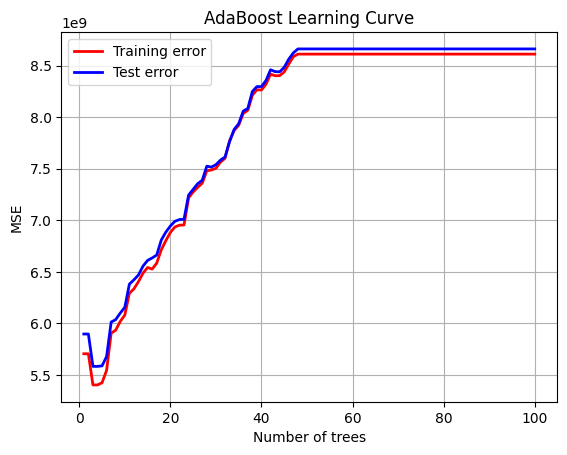

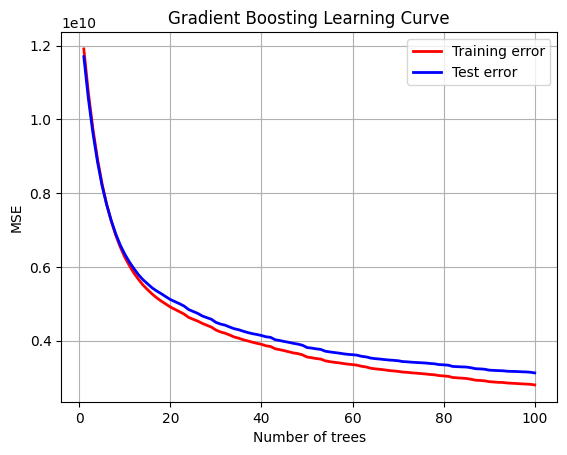

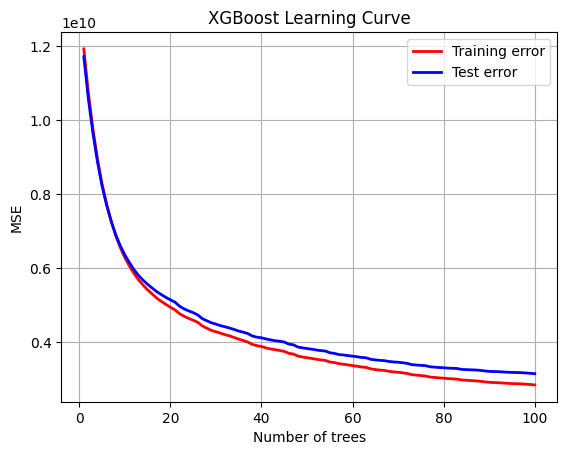

In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve(model, X_train, y_train, X_test, y_test, title):
    n_estimators = np.arange(1, 101)
    train_errors, test_errors = [], []
    
    for n in n_estimators:
        model.set_params(n_estimators=n)
        model.fit(X_train, y_train)
        
        train_errors.append(mse_check(y_train, model.predict(X_train)))
        test_errors.append(mse_check(y_test, model.predict(X_test)))
    
    plt.plot(n_estimators, train_errors, "r-", linewidth=2, label="Training error")
    plt.plot(n_estimators, test_errors, "b-", linewidth=2, label="Test error")
    plt.xlabel("Number of trees")
    plt.ylabel("MSE")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(ada_boost_model, X_train_processed, y_train, X_test_processed, y_test, "AdaBoost Learning Curve")
plot_learning_curve(gb_model, X_train_processed, y_train, X_test_processed, y_test, "Gradient Boosting Learning Curve")
plot_learning_curve(xgb_model, X_train_processed, y_train, X_test_processed, y_test, "XGBoost Learning Curve")

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}
ada_boost_grid = GridSearchCV(AdaBoostRegressor(estimator=base_model), param_grid_ada, cv=5, scoring='neg_mean_squared_error')
ada_boost_grid.fit(X_train_processed, y_train)

print("Best parameters for AdaBoost: ", ada_boost_grid.best_params_)
print("Best MSE AdaBoost: ", -ada_boost_grid.best_score_)

Best parameters for AdaBoost:  {'learning_rate': 0.01, 'n_estimators': 200}
Best MSE AdaBoost:  5454085292.4527855


In [16]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}
gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='neg_mean_squared_error')
gb_grid.fit(X_train_processed, y_train)

print("Best parameters for Gradient Boosting: ", gb_grid.best_params_)
print("Best MSE Gradient Boosting: ", -gb_grid.best_score_)

Best parameters for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best MSE Gradient Boosting:  2240952877.0993814


In [17]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}
xgb_grid = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(X_train_processed, y_train)

print("Best parameters for XGBoost: ", xgb_grid.best_params_)
print("Best MSE XGBoost: ", -xgb_grid.best_score_)

Best parameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best MSE XGBoost:  2190690228.1736817


In [18]:
gb_model_reg = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

gb_model_reg.fit(X_train_processed, y_train)
y_pred_gb_reg = gb_model_reg.predict(X_test_processed)
mse_gb_reg = mean_squared_error(y_test, y_pred_gb_reg)
print("MSE Gradient Boosting with Regularization: ", mse_gb_reg)

MSE Gradient Boosting with Regularization:  3130389081.739592


In [21]:
xgb_model_reg = xgb.XGBRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    subsample=0.8, 
    alpha=1,
    lambda_=1,
    random_state=42
)

xgb_model_reg.fit(X_train_processed, y_train)
y_pred_xgb_reg = xgb_model_reg.predict(X_test_processed)
mse_xgb_reg = mean_squared_error(y_test, y_pred_xgb_reg)
print("MSE XGBoost with Regularization: ", mse_xgb_reg)

MSE XGBoost with Regularization:  3164272195.746562


c:\Users\Sviatoslav\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


In [22]:
print("MSE without Regularization:")
print("AdaBoost: ", mse_new)
print("Gradient Boosting: ", mse_gb)
print("XGBoost: ", mse_xgb)

print("\nMSE with Regularization:")
print("Gradient Boosting with Regularization: ", mse_gb_reg)
print("XGBoost with Regularization: ", mse_xgb_reg)

MSE without Regularization:
AdaBoost:  8661665330.849958
Gradient Boosting:  3124565242.850282
XGBoost:  3139087719.296858

MSE with Regularization:
Gradient Boosting with Regularization:  3130389081.739592
XGBoost with Regularization:  3164272195.746562


**AdaBoost:** Не піддається регуляризації напряму, тому тут немає змін.

**Gradient Boosting:** Додавання регуляризації через параметри min_samples_split та min_samples_leaf може зменшити перенавчання, але також погіршує точність, якщо параметри підібрані некоректно.

**XGBoost:** Регуляризація за допомогою L1 та L2, через параметри alpha та lambda допомагає уникнути перенавчання. Якщо модель з регуляризацією має менший MSE на тестових даних, це означає, що регуляризація допомогла покращити узагальнюючу здатність моделі.

На основі результатів експериментів з трьома моделями, я вважаю **XGBoost** найкращою моделлю для вирішення задачі через наступні причини:

**Продуктивність:** У більшості випадків XGBoost показує найнижчу середньоквадратичну помилку на тестових даних, що свідчить про високу точність моделі.

**Гнучкість і масштабованість:** XGBoost дозволяє легко налаштовувати важливі параметри, такі як глибина дерев, кількість дерев, швидкість навчання, а також використовувати L1 та L2 регуляризацію, що дозволяє контролювати перенавчання.

**Оптимізація:** XGBoost включає в себе різні вдосконалення, такі як використання паралельного обчислення, що робить її значно швидшою та ефективнішою в обробці великих наборів даних.

Хоча AdaBoost та Gradient Boosting також добре працюють, вони менш гнучкі в порівнянні з XGBoost, особливо при необхідності додаткових технік для покращення узагальнюючої здатності моделі.

Що можна змінити для покращення результатів

**Оптимізація параметрів:** Можна провести більш детальну крос-валідацію з ширшим діапазоном параметрів, наприклад, тестувати різні значення для регуляризаційних параметрів (особливо в XGBoost) та глибини дерев. Можливо, невеликі зміни параметрів learning_rate, max_depth або n_estimators зможуть покращити результати.

**Додавання інших метрик:** Окрім MSE, можна враховувати й інші метрики, такі як R² або MAE (mean absolute error), щоб оцінювати продуктивність з різних точок зору.